
# Forêt Aléatoire (Random Forest) en Machine Learning

Dans ce notebook, nous allons explorer l'algorithme de **Forêt Aléatoire**, un puissant modèle d'ensemble basé sur les arbres de décision.
Nous verrons :

- Ce qu'est une forêt aléatoire
- Comment elle fonctionne
- Une implémentation pour un problème de classification
- Une implémentation pour un problème de régression



## Qu'est-ce qu'une Forêt Aléatoire ?

Une forêt aléatoire est un ensemble de plusieurs arbres de décision, combinés pour améliorer les performances générales du modèle.
Chaque arbre est entraîné sur un échantillon différent de données, avec une sélection aléatoire de caractéristiques.

### Avantages :
- Réduction du sur-apprentissage (overfitting)
- Bonne précision même sans hyperparamètres bien réglés
- Fonctionne bien sur des jeux de données variés

### Fonctionnement :
1. Bootstrap : on sélectionne plusieurs sous-ensembles de données (avec remplacement).
2. Construction d'arbres de décision pour chaque sous-ensemble.
3. Agrégation des résultats (vote majoritaire pour la classification, moyenne pour la régression).


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score



## Exemple de Classification : Jeu de données Iris

Nous allons utiliser le jeu de données `iris`, qui contient des données sur trois espèces de fleurs.


Exactitude (Accuracy) : 0.9649122807017544
Précision (Precision) : 0.9652053622194477
Rappel (Recall) : 0.9649122807017544
Score F1 (F1 Score) : 0.9647382344750765


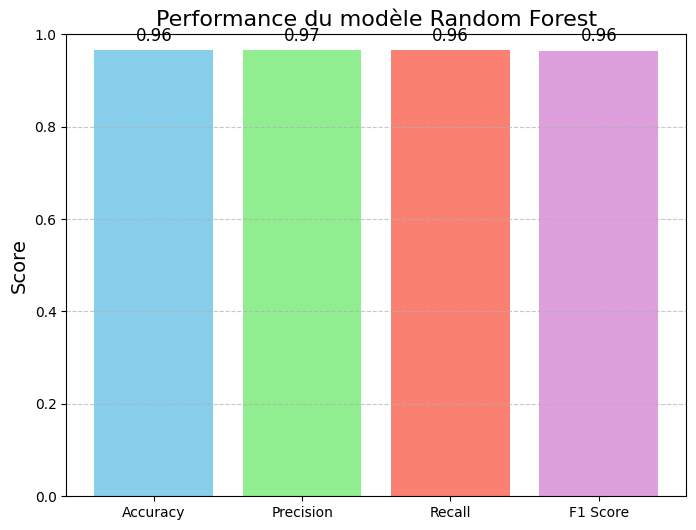

In [4]:
# Chargement des données
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Forêt Aléatoire
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Exactitude (Accuracy) :", accuracy)
print("Précision (Precision) :", precision)
print("Rappel (Recall) :", recall)
print("Score F1 (F1 Score) :", f1)

# Visualisation
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8,6))
bars = plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'plum'])
plt.ylim(0, 1)
plt.title('Performance du modèle Random Forest', fontsize=16)
plt.ylabel('Score', fontsize=14)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Exemple de Régression : Prix des maisons (Boston Housing)

Nous allons maintenant prédire le prix des maisons à l’aide de la forêt aléatoire.


MSE : 9.619662013157892
R² Score : 0.8708997131330258


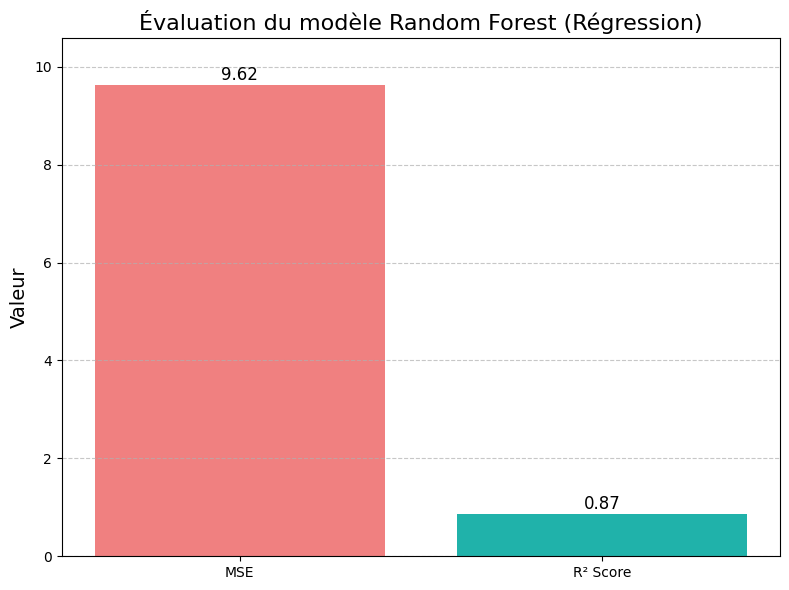

In [10]:
# Chargement des données
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data_X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target_Y = raw_df.values[1::2, 2]
X_regression = data_X
y_regression = target_Y

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

# Modèle Forêt Aléatoire pour la régression
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("R² Score :", r2)

# Visualisation
metrics = ['MSE', 'R² Score']
scores = [mse, r2]

plt.figure(figsize=(8,6))
bars = plt.bar(metrics, scores, color=['lightcoral', 'lightseagreen'])
plt.title('Évaluation du modèle Random Forest (Régression)', fontsize=16)
plt.ylabel('Valeur', fontsize=14)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02*(1 if yval > 0 else -1), f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(min(0, min(scores)) * 1.1, max(scores) * 1.1)  # Add a little padding
plt.tight_layout()
plt.show()


## Visualisation de l'importance des caractéristiques (Classification)

Nous pouvons visualiser quelles caractéristiques sont les plus importantes pour la prédiction.


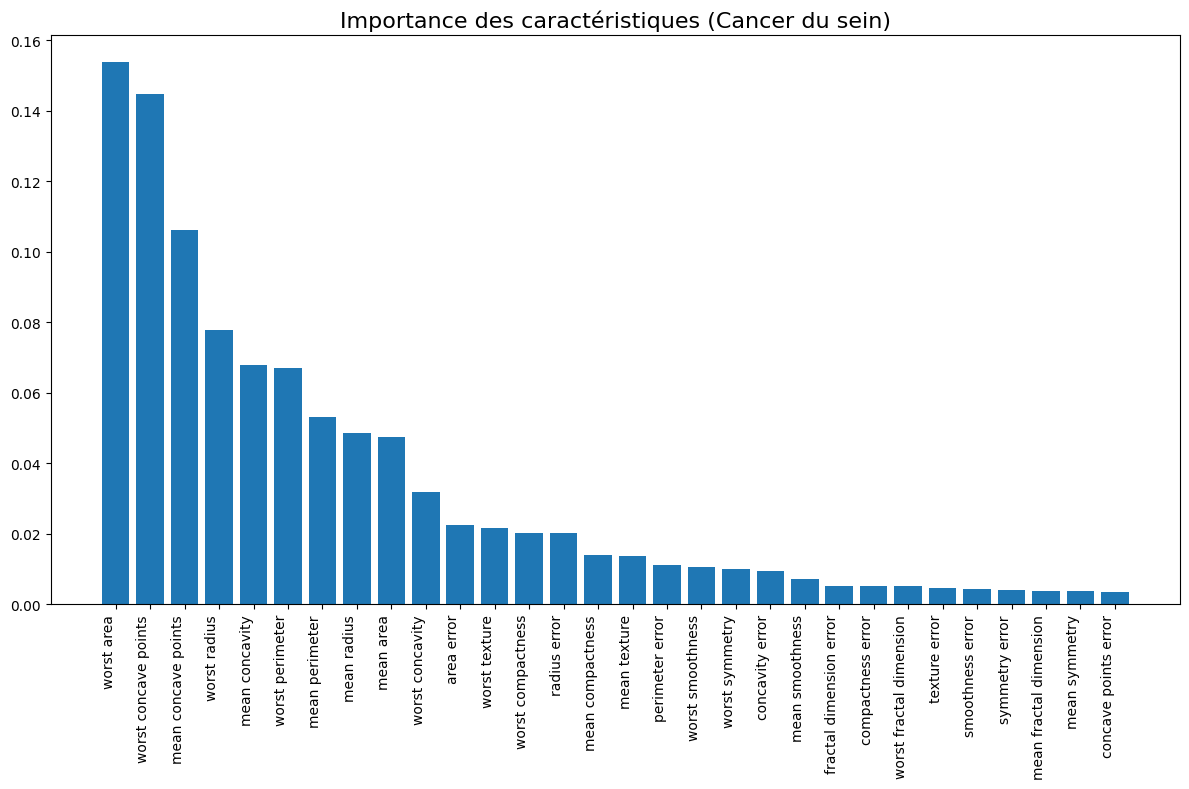

In [8]:
# Importance des caractéristiques
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cancer.feature_names

# Tracer l'importance
plt.figure(figsize=(12,8))
plt.title("Importance des caractéristiques (Cancer du sein)", fontsize=16)
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90, ha='right', fontsize=10)
plt.tight_layout()  # <-- ADDED: adjust automatically to avoid overlap
plt.show()



## Visualisation de l'importance des caractéristiques (Régression)

Même principe pour la prédiction du prix des maisons.


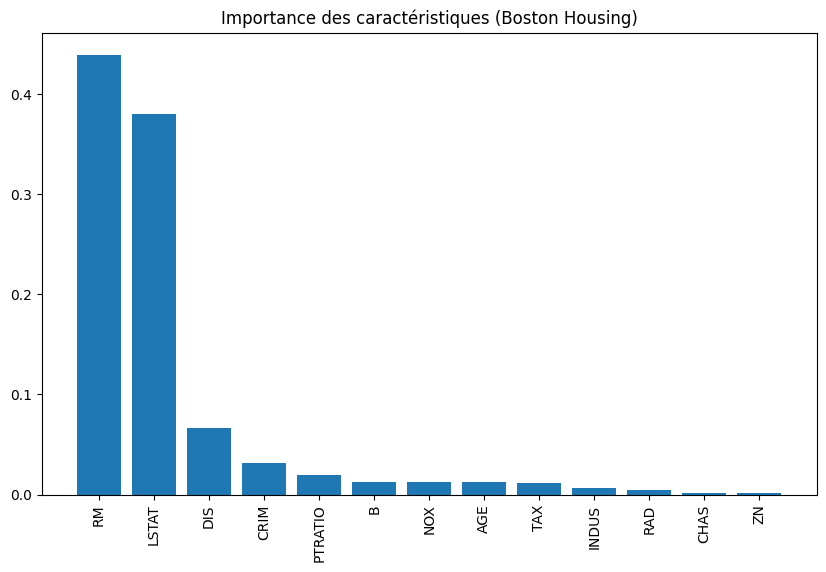

In [ ]:
# Chargement des données
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data_X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target_Y = raw_df.values[1::2, 2]
X_regression = data_X
y_regression = target_Y

# Définir les noms des caractéristiques
features = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Importance des caractéristiques
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Tracer
plt.figure(figsize=(10,6))
plt.title("Importance des caractéristiques (Boston Housing)")
plt.bar(range(X_regression.shape[1]), importances[indices], align="center")
plt.xticks(range(X_regression.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()


## Visualisation d'un arbre unique

Même si la forêt contient plusieurs arbres, on peut visualiser un seul arbre pour mieux comprendre.

(Attention : Un seul arbre n'est pas représentatif de la forêt complète.)


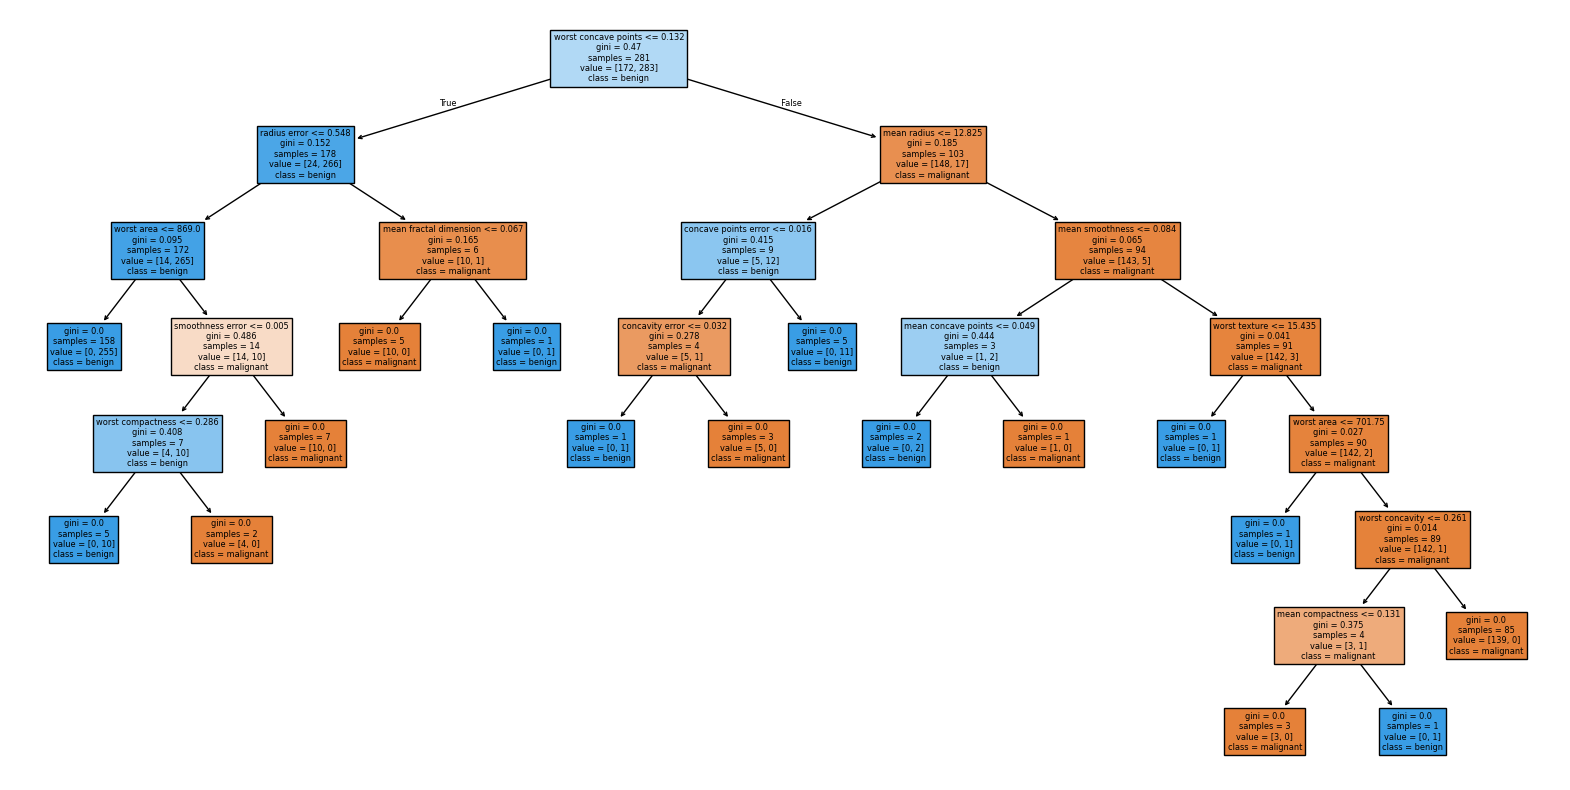

In [9]:

from sklearn.tree import plot_tree

# Afficher un arbre
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.show()
